In [1]:
import sys
import os

# add project root to Python path
sys.path.append(os.path.abspath(".."))

from src.bs import bs_pricing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
S0 = 100
K = 105
r = 0
sigma = 0.2
t = 0
T = 2

C:\Users\olait\AppData\Local\Temp\ipykernel_9648\1852280273.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


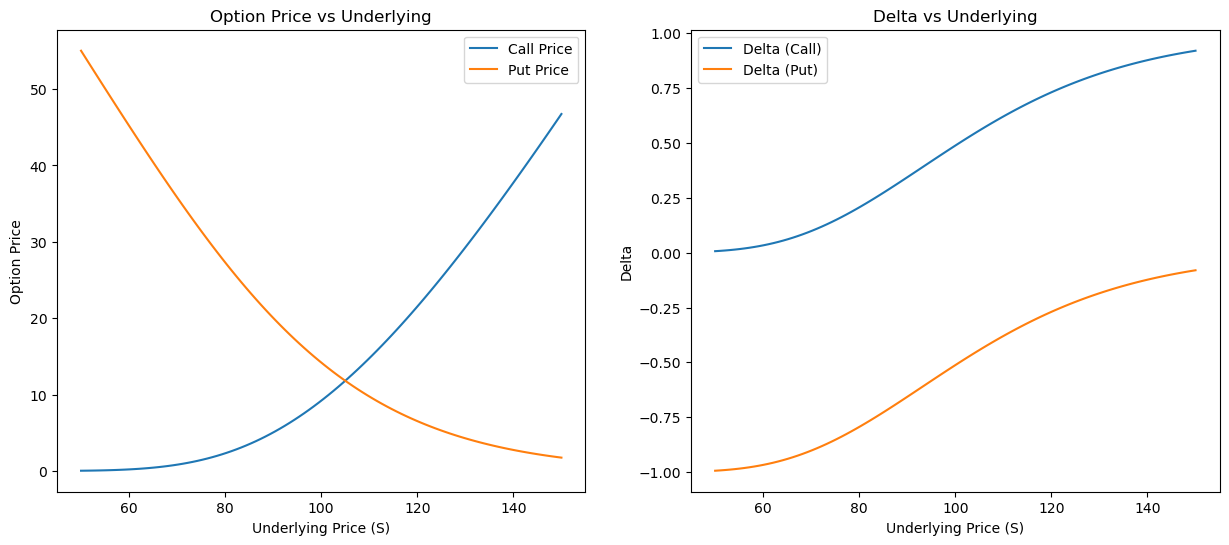

In [3]:
# OPTION PRICES AND DELTA VS UNDERLYING

S_values = np.linspace(50, 150, 100)

call_ = [bs_pricing(S, K, r, sigma, t, T, 'C')['price'] for S in S_values]
put_ = [bs_pricing(S, K, r, sigma, t, T, 'P')['price'] for S in S_values]

#Option prices vs Underlying

fig, ax = plt.subplots(1,2, figsize=(15, 6))

ax[0].plot(S_values, call_, label='Call Price')
ax[0].plot(S_values, put_, label='Put Price')
ax[0].set_xlabel('Underlying Price (S)')
ax[0].set_ylabel('Option Price')
ax[0].set_title('Option Price vs Underlying')
ax[0].legend()


delta_call_ = [bs_pricing(S, K, r, sigma, t, T, 'C')['delta'] for S in S_values]
delta_put_ = [bs_pricing(S, K, r, sigma, t, T, 'P')['delta'] for S in S_values]
#Option prices vs Delta
ax[1].plot(S_values, delta_call_, label='Delta (Call)')
ax[1].plot(S_values, delta_put_, label='Delta (Put)')
ax[1].set_xlabel('Underlying Price (S)')
ax[1].set_ylabel('Delta')
ax[1].set_title('Delta vs Underlying')
ax[1].legend()
fig.show()

C:\Users\olait\AppData\Local\Temp\ipykernel_9648\1450146082.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


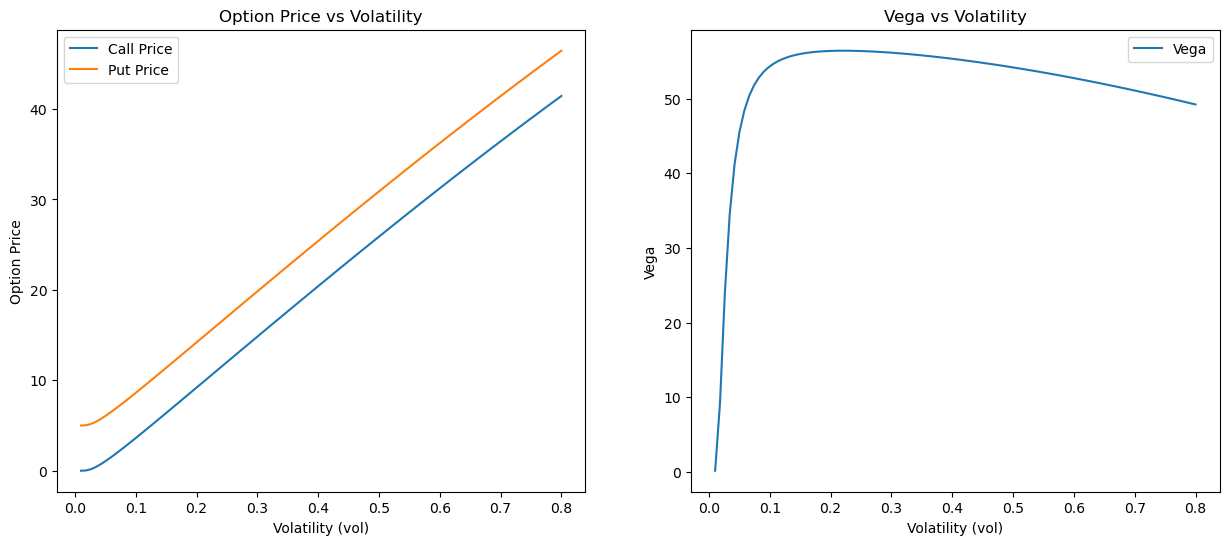

In [4]:
# OPTION PRICES AND VEGA VS VOLATILITY


sigma_values = np.linspace(0.01, 0.8, 100)

#Option prices vs Volatility
call_ = [bs_pricing(S0, K, r, sigma_, t, T, 'C')['price'] for sigma_ in sigma_values]
put_ = [bs_pricing(S0, K, r, sigma_, t, T, 'P')['price'] for sigma_ in sigma_values]

fig1, ax1 = plt.subplots(1,2, figsize=(15,6))

ax1[0].plot(sigma_values, call_, label='Call Price')
ax1[0].plot(sigma_values, put_, label='Put Price')
ax1[0].set_xlabel("Volatility (vol)")
ax1[0].set_ylabel("Option Price")
ax1[0].set_title("Option Price vs Volatility")
ax1[0].legend()


vega_ = [bs_pricing(S0, K, r, sigma_, t, T, 'C')['vega'] for sigma_ in sigma_values]

#Vega vs Volatility
ax1[1].plot(sigma_values, vega_, label='Vega')
ax1[1].set_xlabel('Volatility (vol)')
ax1[1].set_ylabel('Vega')
ax1[1].set_title("Vega vs Volatility")
ax1[1].legend()
fig1.show()

C:\Users\olait\AppData\Local\Temp\ipykernel_9648\4280968340.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


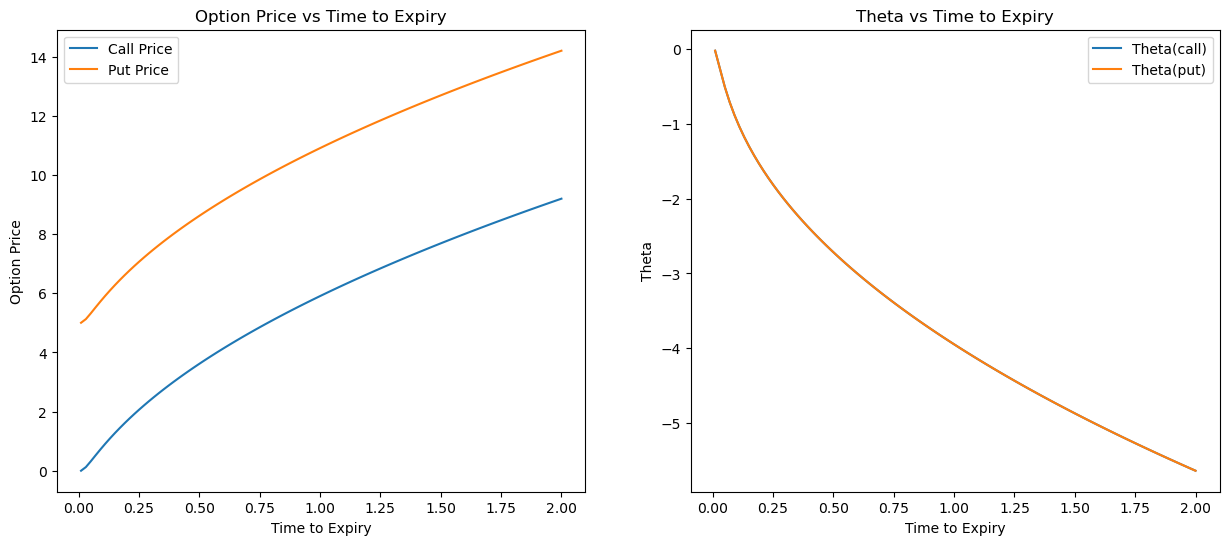

In [5]:
# OPTION PRICES AND THETA VS TIME TO MATURITY

t_values = np.linspace(0.01, 2.0, 100)

call_ = [bs_pricing(S0, K, r, sigma, t, T_, 'C')['price'] for T_ in t_values]
put_ = [bs_pricing(S0, K, r, sigma, t, T_, 'P')['price'] for T_ in t_values]

#Option Prices vs Time to Expiry

fig2, ax2 = plt.subplots(1,2, figsize=(15,6))

ax2[0].plot(t_values, call_, label='Call Price')
ax2[0].plot(t_values, put_, label='Put Price')
ax2[0].set_xlabel('Time to Expiry')
ax2[0].set_ylabel('Option Price')
ax2[0].set_title('Option Price vs Time to Expiry')
ax2[0].legend()



theta_call = [bs_pricing(S0, K, r, sigma, t, T_, 'C')['theta'] for T_ in t_values]
theta_put = [bs_pricing(S0, K, r, sigma, t, T_, 'P')['theta'] for T_ in t_values]

#Theta vs Time to Maturity
ax2[1].plot(t_values, theta_call, label='Theta(call)')
ax2[1].plot(t_values, theta_put, label='Theta(put)')
ax2[1].set_xlabel('Time to Expiry')
ax2[1].set_ylabel('Theta')
ax2[1].set_title('Theta vs Time to Expiry')
ax2[1].legend()
fig2.show()